# Comparing Experiments

**Note**: the appearance of this notebook will depend on the environment and screen size you're using. If the tables are being clipped or the figures look off, consider trying Google Colab or Github via the buttons below. This notebook was created in VSCode, and will likely look best locally.

<a target="_blank" href="https://colab.research.google.com/github/ioverho/bayes_conf_mat/blob/main/documentation/Getting%20Started/comparing_experiments.ipynb">
  <img alt="Static Badge" src="https://img.shields.io/badge/Run_in_Colab-_?style=for-the-badge&logo=googlecolab&labelColor=gray&color=1082c3&link=https%3A%2F%2Fgithub.com%2Fioverho%2Fbayes_conf_mat%2Fblob%2Fmain%2Fdocumentation%2FGetting%2520Started%2Fcomparing_experiments.ipynb">
</a>
<a target="_blank" href="https://github.com/ioverho/bayes_conf_mat/blob/main/documentation/Getting%20Started/comparing_experiments.ipynb">
  <img alt="Static Badge" src="https://img.shields.io/badge/View_in_Github-_?style=for-the-badge&logo=github&labelColor=gray&color=1082c3&link=https%3A%2F%2Fgithub.com%2Fioverho%2Fbayes_conf_mat%2Fblob%2Fmain%2Fdocumentation%2FGetting%2520Started%2Fcomparing_experiments.ipynb">
</a>

## Setup



In [1]:
confusion_matrix_a = [
    [258, 7, 12, 42],
    [2, 380, 4, 3],
    [1, 22, 371, 0],
    [37, 9, 6, 199],
]

confusion_matrix_b = [
    [265, 13, 18, 42],
    [5, 382, 5, 3],
    [7, 20, 359, 2],
    [36, 13, 7, 176],
]

In [2]:
from bayes_conf_mat import Study

study = Study(
    name="comparing_experiments",
    seed=0,
    num_samples=10000,
    ci_probability=0.95,
)

study.add_experiment(
    "a/test_a", confusion_matrix_a, prevalence_prior=1.0, confusion_prior=1.0
)

study.add_experiment(
    "b/test_b", confusion_matrix_b, prevalence_prior=1.0, confusion_prior=1.0
)

study.add_metric(metric="accuracy")

In [3]:
study.report_metric_summaries(metric="acc", class_label=0)

Group,Experiment,Observed,Median,Mode,95.0% HDI,MU,Skew,Kurt
a,test_a,0.8928,0.8856,0.8872,"[0.8686, 0.9023]",0.0337,-0.1179,0.0216
b,test_b,0.8736,0.8668,0.8685,"[0.8480, 0.8841]",0.0361,-0.1364,0.0002


In [4]:
study.report_comparison(
    metric="acc",
    class_label=0,
    experiment_group_a="a",
    experiment_a="test_a",
    experiment_group_b="b",
    experiment_b="test_b",
    min_sig_diff=0.01,
)

Experiment <a/test_a>'s <accuracy> being greater than <b/test_b> could be considered 'dubious'* (Median Δ=0.0189, 95.00% HDI=[-0.0057, 0.0434], p_direction=93.32%).
There is a 77.41% probability that this difference is bidirectionally significant (ROPE=[-0.0100, 0.0100], p_ROPE=22.59%).
Bidirectional significance could be considered 'undecided'*.
Relative to two random models (p_ROPE,random=45.16%)  significance is 1.9991 times more likely.
There is a 76.20% probability that this difference is significantly positive (p_pos=76.20%, p_neg=1.21%).

* These interpretations are based off of loose guidelines.


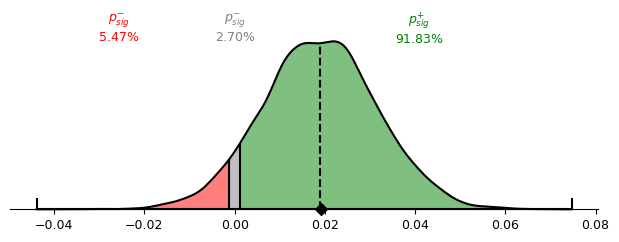

In [10]:
study.plot_comparison(
    metric="accuracy",
    class_label=0,
    experiment_group_a="a",
    experiment_a="test_a",
    experiment_group_b="b",
    experiment_b="test_b",
);

## The Region of Practical Equivalence (ROPE)

The notion of significance 

In [11]:
study.report_comparison(
    metric="acc",
    class_label=0,
    experiment_group_a="a",
    experiment_a="test_a",
    experiment_group_b="b",
    experiment_b="test_b",
    min_sig_diff=0.01,
)

Experiment <a/test_a>'s <accuracy> being greater than <b/test_b> could be considered 'dubious'* (Median Δ=0.0189, 95.00% HDI=[-0.0057, 0.0434], p_direction=93.32%).
There is a 77.41% probability that this difference is bidirectionally significant (ROPE=[-0.0100, 0.0100], p_ROPE=22.59%).
Bidirectional significance could be considered 'undecided'*.
Relative to two random models (p_ROPE,random=45.16%)  significance is 1.9991 times more likely.
There is a 76.20% probability that this difference is significantly positive (p_pos=76.20%, p_neg=1.21%).

* These interpretations are based off of loose guidelines.


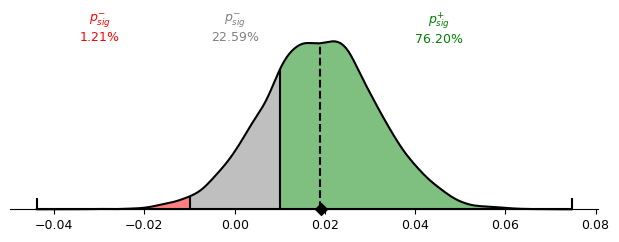

In [12]:
study.plot_comparison(
    metric="accuracy",
    class_label=0,
    experiment_group_a="a",
    experiment_a="test_a",
    experiment_group_b="b",
    experiment_b="test_b",
    min_sig_diff=0.01,
);

## Comparing to a Random Baseline

In [13]:
study.report_random_metric_summaries(metric="accuracy", class_label=0)

Group,Experiment,Median,Mode,95.0% HDI,MU,Skew,Kurt
a,test_a,0.2498,0.2476,"[0.2284, 0.2730]",0.0447,0.0451,-0.0211
b,test_b,0.2501,0.2524,"[0.2276, 0.2731]",0.0455,0.0404,0.0316


In [14]:
study.report_comparison_to_random(metric="accuracy", class_label=0)

Group,Experiment,Median Δ,$p_{dir}$,ROPE,$p_{ROPE}$,$p_{sig}$,$p_{sig}^+$,$p_{sig}^-$
a,test_a,0.6357,1.0000,"[-0.0015, 0.0015]",0.0000,1.0000,1.0000,0.0000
b,test_b,0.6163,1.0000,"[-0.0015, 0.0015]",0.0000,1.0000,1.0000,0.0000


## Next Steps